<a href="https://colab.research.google.com/github/navneetk2001/Machine-Learning/blob/master/Logistic_Regression_step_by_step.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing dataset
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [ ]:
import pandas as pd
df=pd.read_csv('heart.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


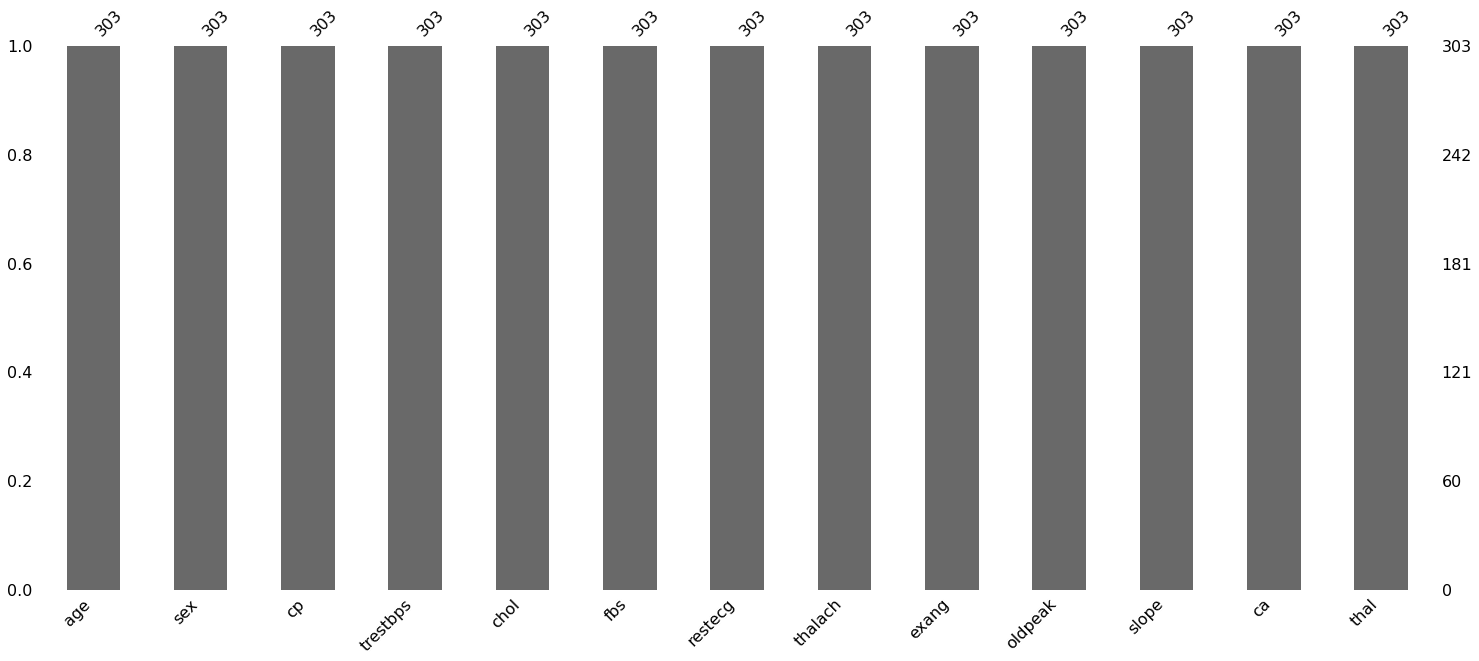

In [ ]:
import missingno as msn
msn.bar(df.iloc[:,0:13])

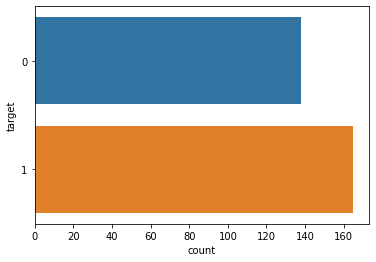

In [ ]:
import seaborn as sns
sns.countplot(y=df.iloc[:,13],data=df)

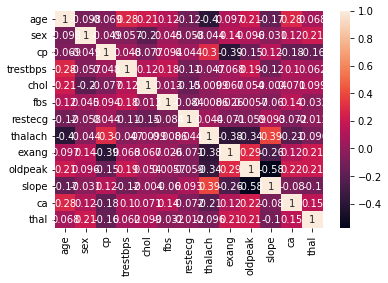

In [ ]:
sns.heatmap(df.iloc[:,:13].corr(),annot=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
X=df.iloc[:,0:13]
Y=df.iloc[:,13]
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled=np.insert(X_scaled,0,values=1,axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)

In [ ]:
n=1000 #number of iterations
alpha=0.01
m,k=X_train.shape
beta=np.zeros(k)
for i in range(n):
 cost_gradient=np.zeros(k)
 z=X_train.dot(beta)
 predicted=1/(1+np.exp(-z))
 difference=predicted-Y_train
 for j in range(k):
     cost_gradient[j]=np.sum(difference.dot(X_train[:,j]))
 for j in range(k):
     beta[j]=beta[j]-(alpha/m)*cost_gradient[j]
print(beta)

[ 0.05498803 -0.09061087 -0.47677149  0.59189833 -0.06018988 -0.05667312
  0.09952113  0.18931744  0.35220815 -0.50636181 -0.44340031  0.37757917
 -0.67914846 -0.55712097]


In [ ]:
Y_predict=1/(1+np.exp(-(X_test.dot(beta))))
Y_label=np.zeros(len(Y_predict))
for i in range(len(Y_predict)):
  if(Y_predict[i]>=0.5):
     Y_label[i]=1

In [ ]:
TP=0
TN=0
FP=0
FN=0
Y_test=np.array(Y_test).reshape(-1,1)
for i in range(len(Y_label)):
 if(Y_test[i]==1 and Y_label[i]==1):
     TP=TP+1
 if(Y_test[i]==1 and Y_label[i]==0):
     FN=FN+1
 if(Y_test[i]==0 and Y_label[i]==1):
     FP=FP+1
 if(Y_test[i]==0 and Y_label[i]==0):
    TN=TN+1
print(TP,TN,FP,FN)

accuracy=(TP+TN)/(TP+TN+FP+FN)
#For positive class:
precision_pos=TP/(TP+FP)
recall_pos=TP/(TP+FN)
f1_score_pos=2*precision_pos*recall_pos/(precision_pos+recall_pos)
print(precision_pos,recall_pos,f1_score_pos)
#For negative class
precision_neg=TN/(TN+FN)
recall_neg=TN/(TN+FP)
f1_score_neg=2*precision_neg*recall_neg/(precision_neg+recall_neg)
print(precision_neg,recall_neg,f1_score_neg)

44 33 8 6
0.8461538461538461 0.88 0.8627450980392156
0.8461538461538461 0.8048780487804879 0.8250000000000001


In [ ]:
macro_precision=(precision_pos+precision_neg)/2
macro_recall=(recall_pos+recall_neg)/2
macro_f1_score=(f1_score_pos+f1_score_neg)/2
print(macro_precision,macro_recall,macro_f1_score)

0.8461538461538461 0.842439024390244 0.8438725490196078


In [ ]:
l1=len(Y_test[Y_test==0])
l2=len(Y_test[Y_test==1])
weighted_precision=(l1*precision_neg+l2*precision_pos)/(l1+l2)
weighted_recall=(l1*recall_neg+l2*recall_pos)/(l1+l2)
weighted_f1_score=(l1*f1_score_neg+l2*f1_score_pos)/(l1+l2)
print(weighted_precision,weighted_recall,weighted_f1_score)

0.8461538461538461 0.8461538461538461 0.845739064856712
